2. Create K-means clustering model on the Iris dataset. The Iris dataset contains
3 classes of iris flower plants with 50 instances each, and 150 instances in
total, where each class refers to a type of iris plant. The data set contains
features like sepal length, sepal width, petal length, petal width. Use K-means
clustering model to find the difference clusters of Iris plants based on the given
features.
a. Analyze the different features of data set.
b. Find the optimum value of k (number of clusters)
c. Create K-means Clustering Model.
d. Visualize the number of clusters.
e. Analyze the different segments of customers.

In [1]:
# a. Analyze the different features of data set.
import pandas as pd

In [2]:
data=pd.read_csv('Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [4]:
data.dropna()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
X = data.iloc[:,1:5]
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [6]:
# b. Find the optimum value of k (number of clusters)
from sklearn.cluster import KMeans
cluster = KMeans(n_clusters=20)

In [8]:
labels = cluster.fit_predict(X)

In [9]:
cluster.inertia_

15.040841927680166

In [10]:
sse = []
for i in range(1, 11):
    cluster = KMeans(n_clusters=i).fit(X)
    labels = cluster.fit_predict(X)
    sse.append(cluster.inertia_)

In [11]:
sse

[680.8244,
 152.36870647733906,
 78.94084142614602,
 57.345409315718165,
 46.535582051282056,
 38.95701115711985,
 34.20755425729453,
 29.955568877177573,
 28.02447326799373,
 25.867010822510824]

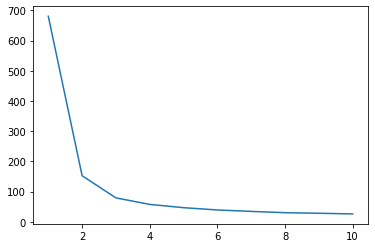

In [12]:
import matplotlib.pyplot as plt
plt.plot(range(1, 11), sse)

In [21]:
# c. Create K-means Clustering Model.
cluster = KMeans(n_clusters=3)
labels = cluster.fit_predict(X)

In [22]:
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

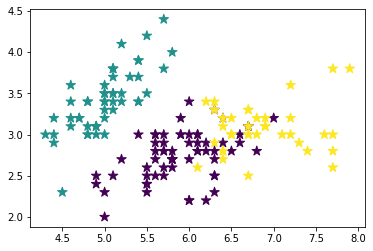

In [24]:
# d. Visualize the number of clusters.
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s=100, marker='*', c=labels)

In [25]:
# e. Analyze the different segments of customers.
cluster.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

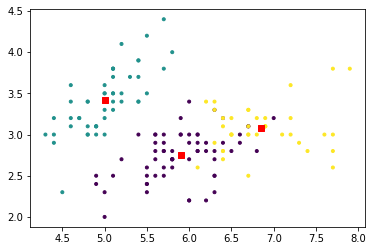

In [26]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], marker='.', c=labels)

plt.scatter(5.9016129, 2.7483871, c='red', marker='s')
plt.scatter(5.006, 3.418, c='red', marker='s')
plt.scatter(6.85, 3.07368421, c='red', marker='s')